<a href="https://colab.research.google.com/github/fmuranda/Climate_Science-/blob/main/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial9.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial9.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Bonus Tutorial 9: Masking with Multiple Conditions

**Week 1, Day 1, Climate System Overview**

**Content creators:** Sloane Garelick, Julia Kent

**Content reviewers:** Katrina Dobson, Younkap Nina Duplex, Danika Gupta, Maria Gonzalez, Will Gregory, Nahid Hasan, Paul Heubel, Sherry Mi, Beatriz Cosenza Muralles, Jenna Pearson, Agustina Pesce, Chi Zhang, Ohad Zivan

**Content editors:** Paul Heubel, Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Paul Heubel, Jenna Pearson, Konstantine Tsafatinos, Chi Zhang, Ohad Zivan

**Our 2024 Sponsors:** CMIP, NFDI4Earth

## ![project pythia](https://projectpythia.org/_static/images/logos/pythia_logo-blue-rtext.svg)

Pythia credit: Rose, B. E. J., Kent, J., Tyle, K., Clyne, J., Banihirwe, A., Camron, D., May, R., Grover, M., Ford, R. R., Paul, K., Morley, J., Eroglu, O., Kailyn, L., & Zacharias, A. (2023). Pythia Foundations (Version v2023.05.01) https://zenodo.org/record/8065851

## ![CMIP.png](https://github.com/ClimateMatchAcademy/course-content/blob/main/tutorials/Art/CMIP.png?raw=true)


# Tutorial Objectives

*Estimated timing of tutorial:* 15 minutes

In the previous Tutorial 8, you masked data using one condition (areas where SST was above 0ºC). You can also mask data using multiple conditions. For example, you can mask data from regions outside a certain spatial area by providing constraints on the latitude and longitude.

In this tutorial, you will practice masking data using multiple conditions in order to interpret SST in the tropical Pacific Ocean in the context of the El Niño Southern Oscillation (ENSO).

# Setup


In [1]:
# installations ( uncomment and run this cell ONLY when using google colab or kaggle )
!pip install pythia_datasets cftime nc-time-axis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.1 MB/s eta 0:00:00


In [2]:
# imports
import xarray as xr
from pythia_datasets import DATASETS
import matplotlib.pyplot as plt

In [3]:
# @title Install and import feedback gadget

!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "comptools_4clim",
            "user_key": "l5jpxuee",
        },
    ).render()


feedback_prefix = "W1D1_T9"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.2 MB/s eta 0:00:00


In [4]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle"
)

In [5]:
# @title Video 1: Past, Present, and Future Climate

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'I9X4XymeO4A'), ('Bilibili', 'BV1QF411X7rg')]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [6]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Past_Present_Future_Climate_Video")

In [7]:
# @markdown
from ipywidgets import widgets
from IPython.display import IFrame

link_id = "dtgax"

print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/dtgax/


In [8]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Past_Present_Future_Climate_Slides")

# Section 1: Using `.where()` with multiple conditions

First, let's load the same data that we used in the previous tutorials (monthly sea surface temperature (SST) data from the climate model CESM2):

In [9]:
filepath = DATASETS.fetch("CESM2_sst_data.nc")
ds = xr.open_dataset(filepath)
ds

/usr/local/lib/python3.11/dist-packages/xarray/conventions.py:204: SerializationWarning: variable 'tos' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


<xarray.Dataset> Size: 47MB
Dimensions:    (time: 180, d2: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) object 1kB 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) object 3kB ...
    lat_bnds   (lat, d2) float64 3kB ...
    lon_bnds   (lon, d2) float64 6kB ...
    tos        (time, lat, lon) float32 47MB ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

The `.where()` method allows us to mask using multiple conditions. To do this, we need to make sure each conditional expression is enclosed in `()`. To combine conditions, we use the `bit-wise and` (`&`) operator and/or the `bit-wise or` (`|`). Let's use `.where()` to isolate locations with temperature values **greater than 25 and less than 30**:

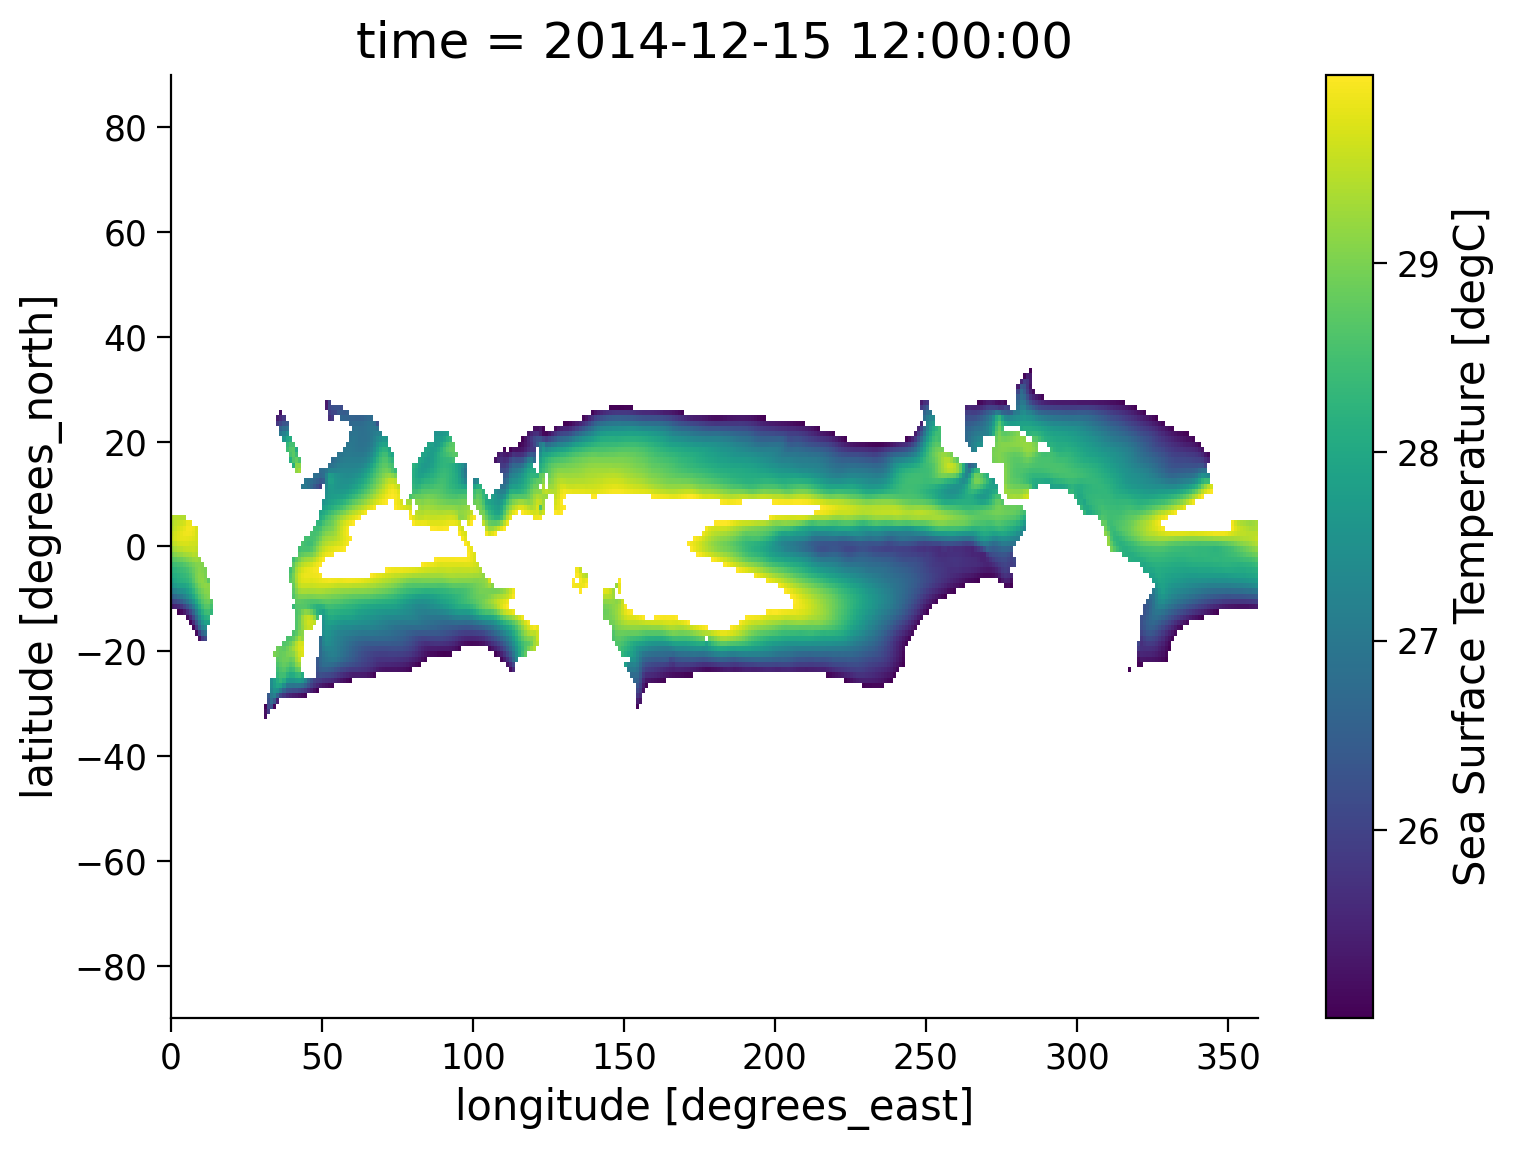

In [10]:
# take the last time step as our data
sample = ds.tos.isel(time=-1)

# just keep data between 25 and 30 degC
sample.where((sample > 25) & (sample < 30)).plot(size=6)

# Section 2: Using `.where()` with a Custom Fill Value

`.where()` can take a second argument, which, if supplied, defines a fill value for the masked region. Below we fill masked regions with a constant `0`:

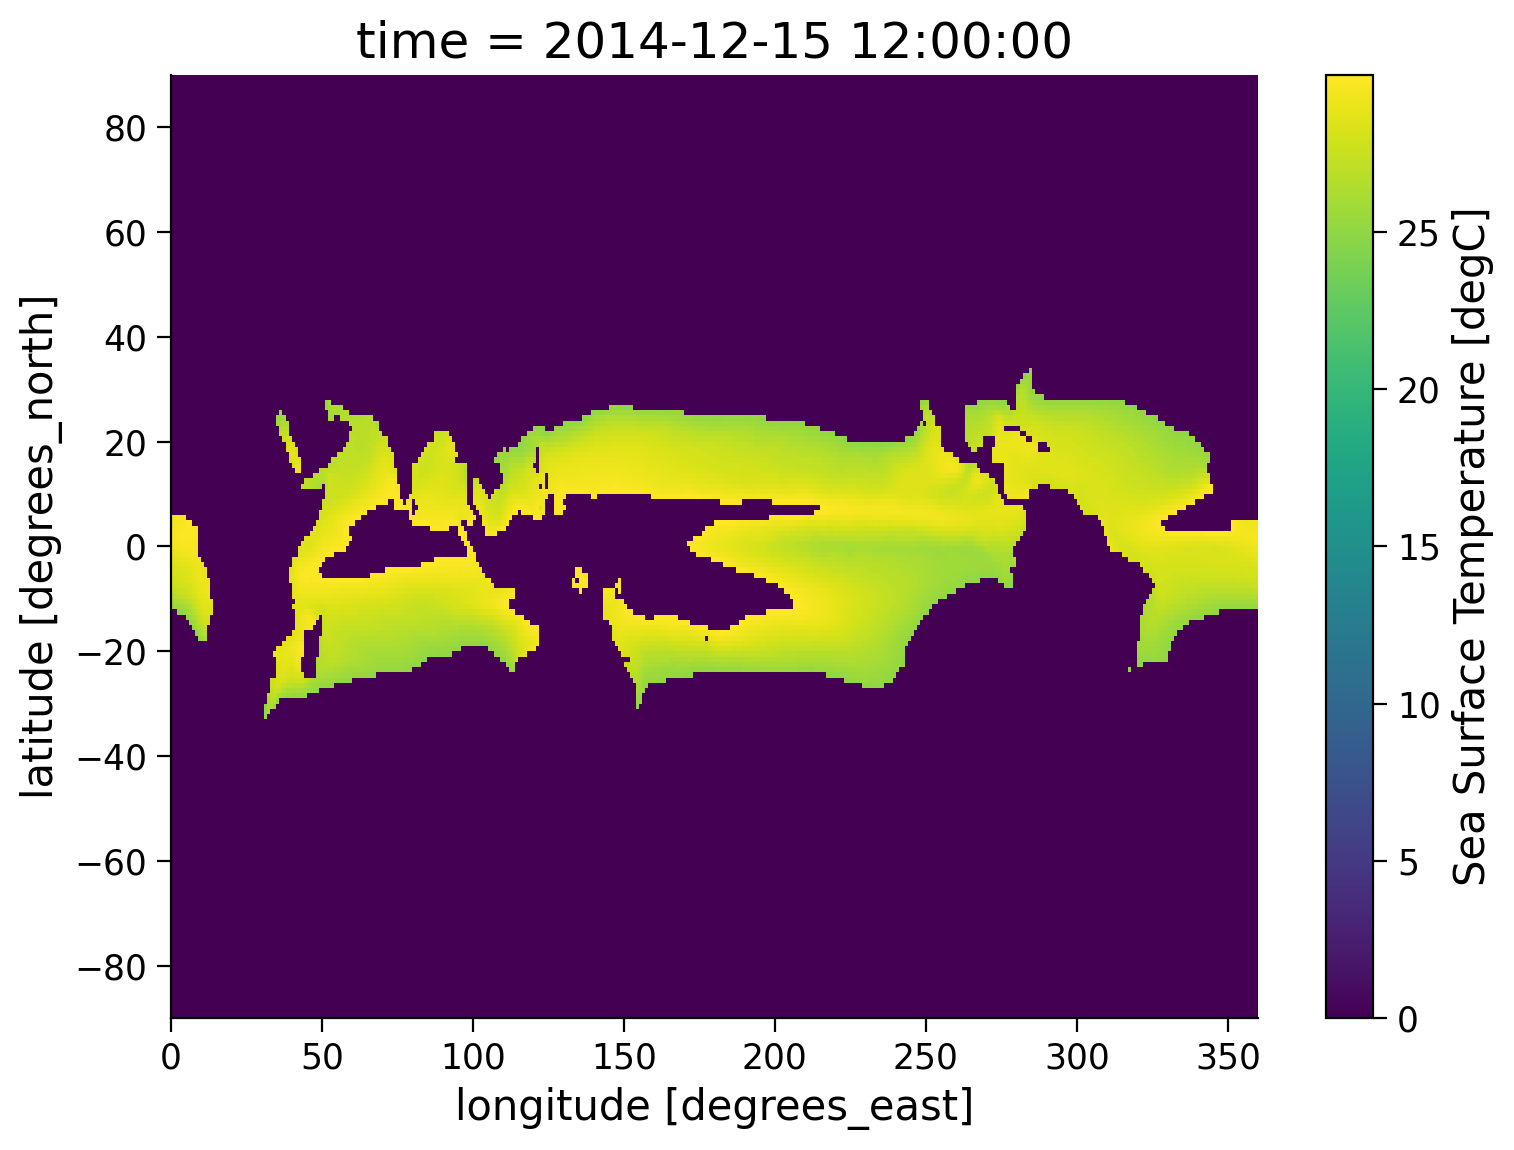

In [11]:
sample.where((sample > 25) & (sample < 30), 0).plot(size=6)

# Section 3: Using `.where()` with Specific Coordinates

We can use coordinates to apply a mask as well. For example, we can use a mask to assess tropical Pacific SST associated with the El Niño Southern Oscillation (ENSO). As we learned in the video, ENSO is a climate phenomenon that originates in the tropical Pacific Ocean but has global impacts on atmospheric circulation, temperature, and precipitation. The two phases of ENSO are El Niño (warmer than average SSTs in the central and eastern tropical Pacific Ocean) and La Niña (cooler than average SSTs in the central and eastern tropical Pacific Ocean). The Niño 3.4 region is an area in the centeral and eastern Pacific Ocean that is often used for determining the phase of ENSO. Below, we will use the `latitude` and `longitude` coordinates to mask everywhere outside of the [Niño 3.4 region](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst/). Note in our data that we are in degrees East, so the values we input for `longitude` will be shifted compared to the figure below.

![](https://www.ncdc.noaa.gov/monitoring-content/teleconnections/nino-regions.gif)


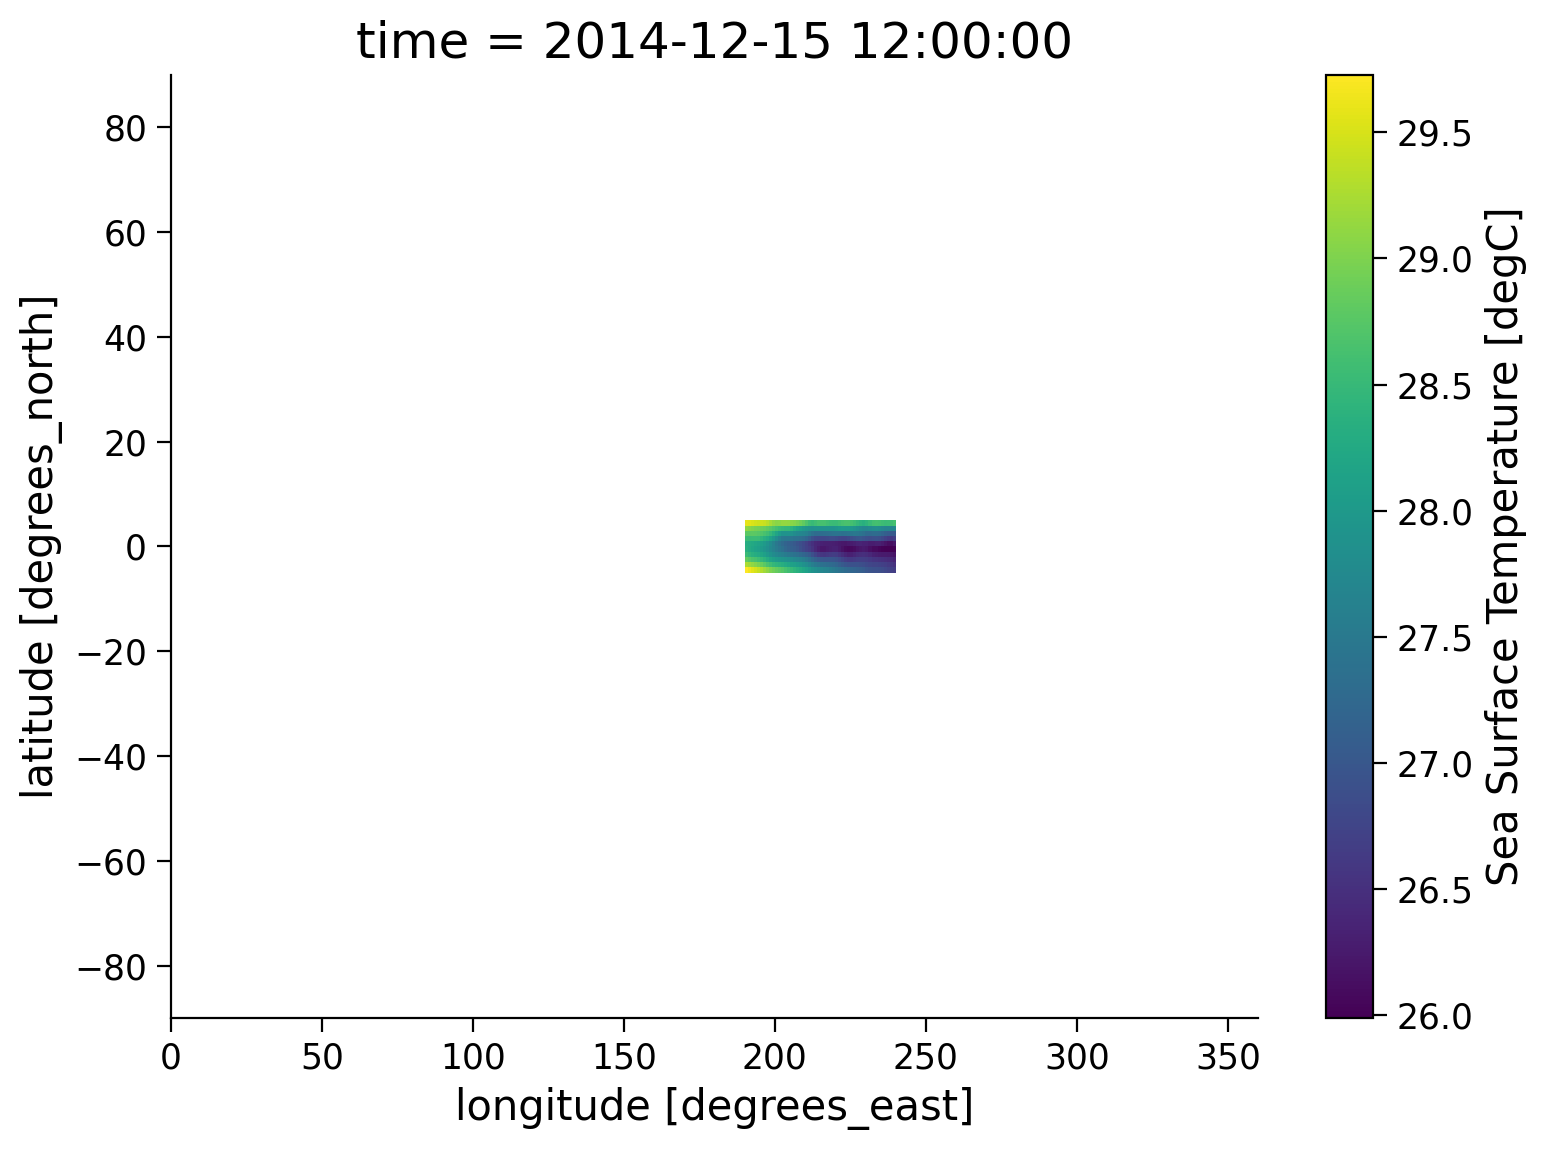

In [12]:
# input the conditions for the latitude and longitude values we wish to preserve
sample.where(
    (sample.lat < 5) & (sample.lat > -5) & (sample.lon > 190) & (sample.lon < 240)
).plot(size=6)

Now let's look at a time series of the data from this masked region. Rather than specifying a certain time period, we can mask all areas outside of the Niño 3.4 region and then take the spatial mean to assess changes in Niño 3.4 SST over this time period.

In [13]:
nino = ds.tos.where(
    (sample.lat < 5) & (sample.lat > -5) & (sample.lon > 190) & (sample.lon < 240)
)
# create a time series of the spatial mean
nino_mean = nino.mean(dim=["lat", "lon"])
nino_mean

<xarray.DataArray 'tos' (time: 180)> Size: 720B
array([26.038105, 26.504568, 27.12734 , 27.849018, 28.161907, 28.084658,
       27.86784 , 27.24528 , 26.758245, 26.700113, 26.857403, 27.123154,
       27.308672, 27.583426, 28.183249, 28.757906, 29.154528, 28.922132,
       28.53686 , 27.924234, 27.596992, 28.069708, 28.465366, 28.796396,
       28.813364, 29.041746, 29.058504, 28.948875, 29.033705, 28.5182  ,
       27.470001, 25.894114, 25.304356, 24.778294, 24.657923, 24.829865,
       24.784239, 25.087923, 25.951988, 26.456623, 26.913073, 27.061895,
       27.022371, 26.912659, 26.674786, 26.8258  , 27.2423  , 27.584587,
       27.613594, 27.96198 , 28.397165, 28.84863 , 28.815447, 28.337137,
       28.044477, 27.763422, 27.307722, 27.099895, 27.47686 , 27.731833,
       27.965302, 28.204346, 28.682114, 28.988297, 29.027813, 28.343401,
       27.305414, 26.22925 , 25.649109, 25.174723, 25.474989, 25.517603,
       25.692791, 26.534395, 27.39288 , 28.077316, 28.354757, 28.162205,
       27.776447, 26.985735, 26.379864, 25.875566, 26.239515, 26.413954,
       26.43264 , 26.737282, 27.485762, 27.919657, 28.250576, 28.280407,
       27.94568 , 27.163921, 26.539751, 26.662567, 27.129774, 27.367727,
       27.42152 , 27.835453, 28.42381 , 29.274023, 29.751787, 29.758398,
       29.497955, 28.835   , 28.271896, 28.26253 , 28.642447, 29.135511,
       29.249847, 29.375532, 29.413488, 29.641144, 29.266842, 28.057215,
       26.326418, 25.036026, 24.046413, 23.709482, 23.932486, 24.301876,
       24.36391 , 24.740543, 25.211073, 26.318329, 26.676466, 26.670122,
       26.414904, 25.677645, 25.267069, 25.08944 , 25.291477, 25.52739 ,
       26.077957, 26.784409, 28.066275, 28.88169 , 29.077969, 29.00119 ,
       28.557648, 27.856934, 27.489183, 27.567287, 27.951187, 28.484648,
       28.87535 , 29.195566, 29.531723, 29.876328, 30.427414, 30.613188,
       30.538868, 29.997889, 29.020626, 28.790129, 29.207897, 29.538794,
       29.92879 , 29.776846, 29.73779 , 30.173899, 30.311964, 29.687555,
       28.445515, 27.23184 , 26.45716 , 26.063555, 26.201458, 26.389908,
       26.35799 , 26.405754, 27.297644, 27.818457, 28.046387, 28.09532 ,
       27.83693 , 27.375696, 27.0029  , 27.156403, 27.53574 , 27.549313],
      dtype=float32)
Coordinates:
  * time     (time) object 1kB 2000-01-15 12:00:00 ... 2014-12-15 12:00:00

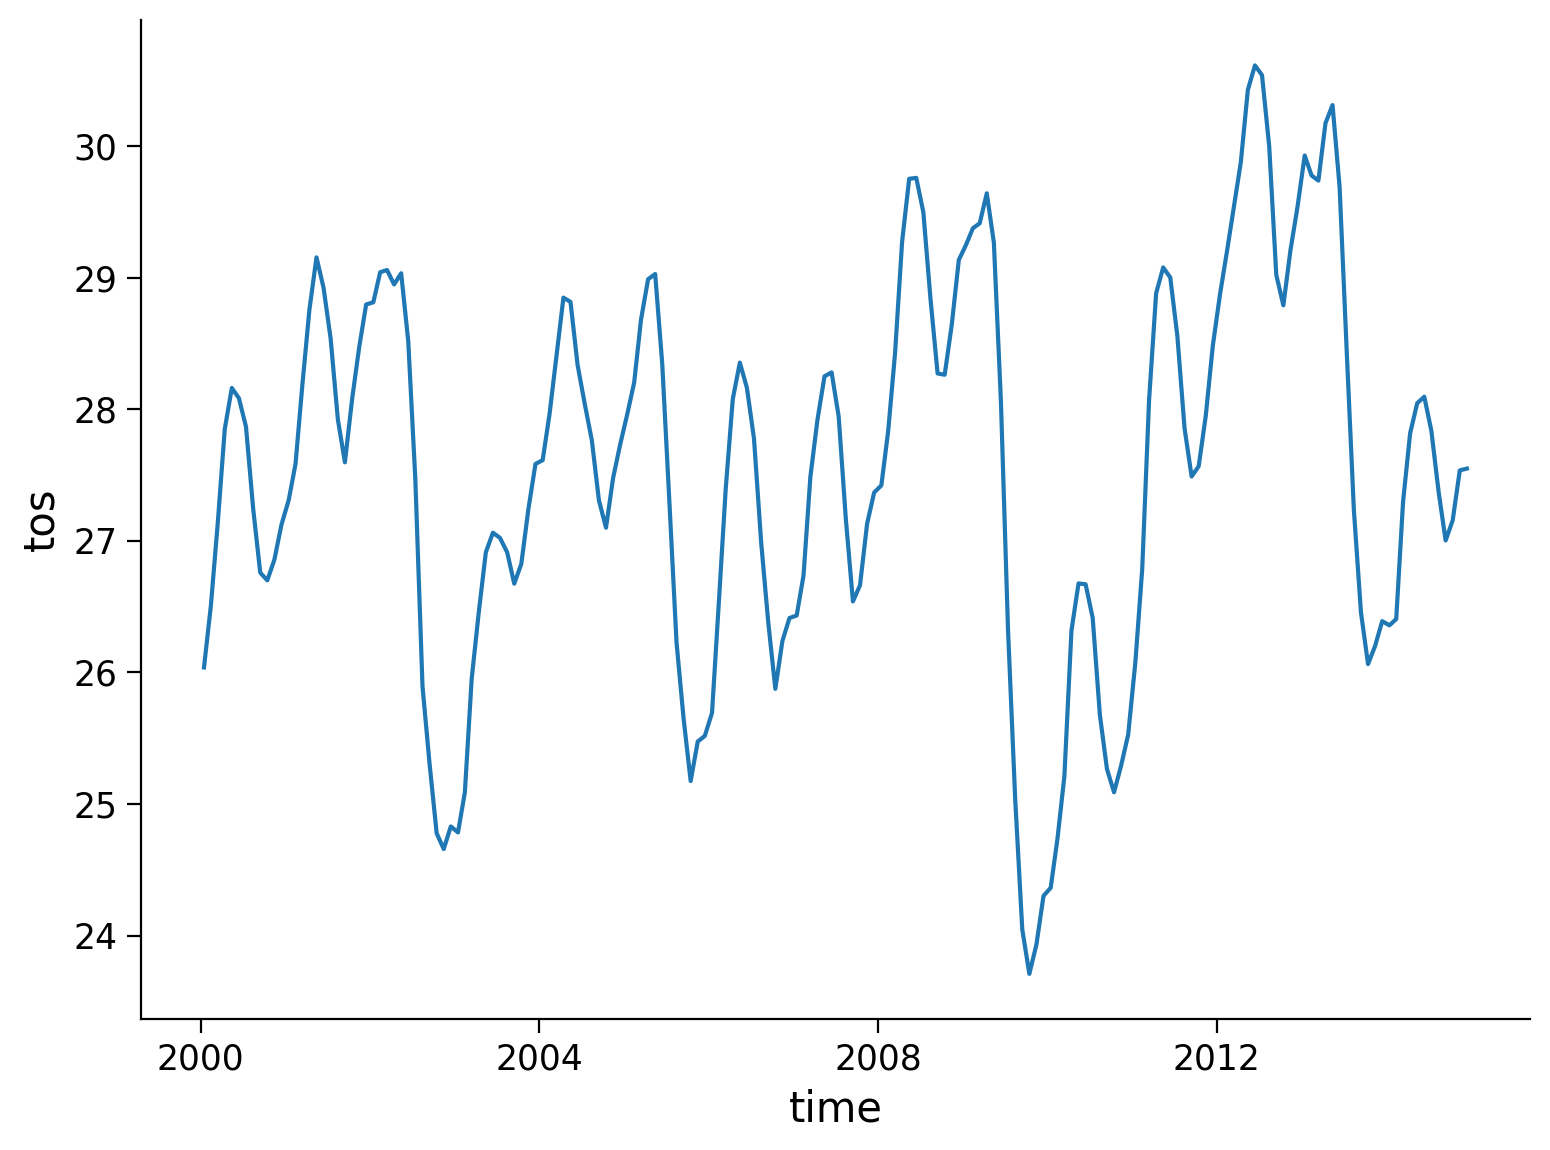

In [14]:
nino_mean.plot()

## Questions 3: Climate Connection

1. What patterns (e.g. cycles, trends) do you observe in this SST time series for the Niño 3.4 region?
2. What do you think might be responsible for the patterns you observe? What about any trends?
3. Notice that we did not use a weighted mean. Do you think the results would be very different if we did weight the mean?

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W1D1_ClimateSystemOverview/solutions/W1D1_Tutorial9_Solution_ffe2e77d.py)



In [15]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_3")

# Summary

- Similar to NumPy, arithmetic operations are vectorized over a DataArray
- Xarray provides aggregation methods like `.sum()` and `.mean()`, with the option to specify which dimension over which the operation will be done
- `.groupby()` enables the convenient split-apply-combine workflow
- The `.where()` method allows for filtering or replacing of data based on one or more provided conditions

# Resources

Code and data for this tutorial is based on existing content from [Project Pythia](https://foundations.projectpythia.org/core/xarray/computation-masking.html).